![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de popularidad en canción

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de popularidad en canción".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad-2025-12-prediccion-popularidad-en-cancion).

## Datos para la predicción de popularidad en cancion

En este proyecto se usará el conjunto de datos de datos de popularidad en canciones, donde cada observación representa una canción y se tienen variables como: duración de la canción, acusticidad y tempo, entre otras. El objetivo es predecir qué tan popular es la canción. Para más detalles puede visitar el siguiente enlace: [datos](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import mutual_info_regression
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import TargetEncoder


In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTrain_Spotify.csv',index_col=0)
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTest_Spotify.csv', index_col=0)
dataTraining

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.84900,9,-10.795,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,22
1,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.19000,7,-12.030,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,22
2,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.50900,1,-9.661,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,37
3,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.03680,8,-23.149,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.92100,2,-7.294,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79795,6mmbWSbU5FElQOocyktyUZ,Amilcare Ponchielli;Gothenburg Symphony Orches...,"Ballet Highlights - The Nutcracker, Romeo & Ju...",La Gioconda / Act 3: Dance Of The Hours,162613,False,0.554,0.00763,4,-30.566,1,0.0502,0.915000,0.000970,0.2210,0.1560,119.502,4,opera,49
79796,0XL75lllKb1jTmEamqwVU6,Sajanka,Time of India,Time of India,240062,False,0.689,0.55400,9,-8.200,1,0.0759,0.091000,0.914000,0.0867,0.1630,148.002,4,trance,30
79797,763FEhIZGILafwlkipdgtI,Frankie Valli & The Four Seasons,Merry Christmas,I Saw Mommy Kissing Santa Claus,136306,False,0.629,0.56000,0,-11.455,0,0.0523,0.595000,0.000000,0.1820,0.8800,118.895,3,soul,0
79798,2VVWWwQ3FiWnmbukTb6Kd3,The Mayries,I Will Wait,I Will Wait,216841,False,0.421,0.10700,6,-15.191,1,0.0335,0.948000,0.000000,0.0881,0.1180,104.218,4,acoustic,44


In [4]:
# Visualización datos de entrenamiento
dataTraining=dataTraining.drop_duplicates()


### Analisis Descriptivo

In [5]:
dataTraining.describe()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
count,7.956900e+04,79569.000000,79569.000000,79569.000000,79569.000000,79569.000000,79569.000000,79569.000000,79569.000000,79569.000000,79569.000000,79569.000000,79569.000000,79569.000000
mean,2.279398e+05,0.567451,0.642077,5.307280,-8.251986,0.637937,0.084744,0.314345,0.157045,0.213375,0.474371,122.094078,3.902726,33.329375
std,1.038332e+05,0.173047,0.251059,3.562188,5.022567,0.480600,0.105641,0.332020,0.310516,0.190155,0.259004,29.934186,0.433855,22.315470
min,1.338600e+04,0.000000,0.000019,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.745450e+05,0.456000,0.473000,2.000000,-9.994000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.121000,4.000000,17.000000
50%,2.128810e+05,0.581000,0.686000,5.000000,-7.007000,1.000000,0.049000,0.168000,0.000041,0.132000,0.464000,122.011000,4.000000,35.000000
75%,2.615060e+05,0.695000,0.854000,8.000000,-4.998000,1.000000,0.084400,0.597000,0.050200,0.273000,0.684000,140.054000,4.000000,50.000000
max,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,100.000000


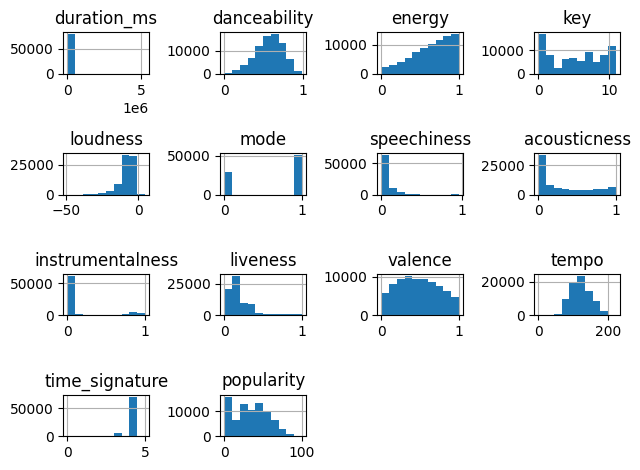

In [6]:
dataTraining.hist()
plt.tight_layout()
plt.show()

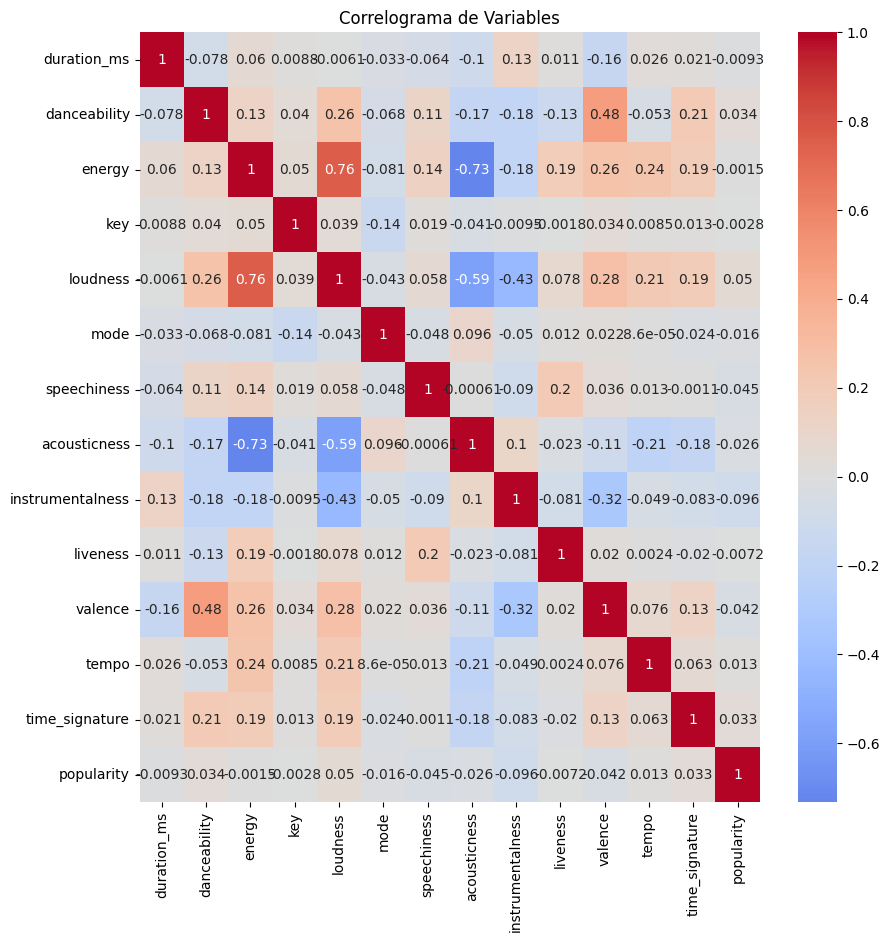

In [7]:
correlation_matrix = dataTraining.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlograma de Variables")
plt.show()

En base al correlograma se decide no utilizar la variable 'energy' por su alta correlación con las variables "loudness" y acousticness".

In [8]:
dataTraining.groupby('key')['popularity'].agg([('mean'),('count')])

,mean,count
key,,
0,32.646969,9155
1,33.210064,7512
2,34.395800,8095
3,33.164066,2499
4,34.781522,6321
5,32.944581,6532
6,33.846653,5543
7,32.614852,9238
8,32.986811,5080


La media de popularidad para los distintos valores de "key" es bastante similiar para todos los niveles. Por ello se decide prescindir de esta variable.

In [9]:
dataTraining.groupby('time_signature')['popularity'].agg([('mean'),('count')])

,mean,count
time_signature,,
0,37.294118,102
1,29.349858,706
3,29.684211,6479
4,33.768943,71017
5,29.222925,1265


In [10]:
dataTraining['time_4']=dataTraining['time_signature']==4

Existe una ligera diferencia de 4 puntos en la popularidad media de "time signature" cuando toma el valor de 4 frente al resto. Se decide utilizar una variable dicotómica que refleja si la canción toma el valor de 4 en "time_signature"

### Feature Engineering

In [11]:
dataTraining['colab_artists']=dataTraining['artists'].str.count(';')
dataTesting['colab_artists']=dataTesting['artists'].str.count(';')

Se agrega una variable para representar la cantidad de artistas involucrados en una canción.

In [12]:
dataTraining['name_length']=dataTraining['track_name'].str.strip().str.len()
dataTesting['name_length']=dataTesting['track_name'].str.strip().str.len()

Se utiliza target encoding para poder aprovechar las variables de género, artista y albúm. Con este procedimiento se evita crear multiples dummies asignando a cada categoría el valor de su media de popularidad. Esta técnica usa vaidación cruzada para evitar la filtración de datos.

In [13]:
enc_genre=TargetEncoder(target_type='continuous',random_state=0)
dataTraining['enc_genre']=enc_genre.fit_transform(dataTraining[['track_genre']],dataTraining['popularity'])
dataTesting['enc_genre']=enc_genre.transform(dataTesting[['track_genre']])

En la base de datos ciertas canciones se repiten porque tienen asignados varios géneros, es decir estas observaciones repetidas comparten los mismos valores en todas las columnas excepto género. Se presenta un ejemplo:

In [14]:
dataTraining[dataTraining["track_id"]=="5ftfVzSLIi5ZxYdNbRtf41"]

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,...,liveness,valence,tempo,time_signature,track_genre,popularity,time_4,colab_artists,name_length,enc_genre
7298,5ftfVzSLIi5ZxYdNbRtf41,The Black Keys,Coffee Moment,Never Gonna Give You Up,218986,False,0.557,0.665,6,-6.19,...,0.0713,0.437,75.803,4,alt-rock,0,True,0,23,34.469064
7956,5ftfVzSLIi5ZxYdNbRtf41,The Black Keys,Coffee Moment,Never Gonna Give You Up,218986,False,0.557,0.665,6,-6.19,...,0.0713,0.437,75.803,4,punk-rock,0,True,0,23,38.151996
31378,5ftfVzSLIi5ZxYdNbRtf41,The Black Keys,Coffee Moment,Never Gonna Give You Up,218986,False,0.557,0.665,6,-6.19,...,0.0713,0.437,75.803,4,punk,0,True,0,23,38.650005
40484,5ftfVzSLIi5ZxYdNbRtf41,The Black Keys,Coffee Moment,Never Gonna Give You Up,218986,False,0.557,0.665,6,-6.19,...,0.0713,0.437,75.803,4,garage,0,True,0,23,40.965764
48364,5ftfVzSLIi5ZxYdNbRtf41,The Black Keys,Coffee Moment,Never Gonna Give You Up,218986,False,0.557,0.665,6,-6.19,...,0.0713,0.437,75.803,4,blues,0,True,0,23,32.319968
69381,5ftfVzSLIi5ZxYdNbRtf41,The Black Keys,Coffee Moment,Never Gonna Give You Up,218986,False,0.557,0.665,6,-6.19,...,0.0713,0.437,75.803,4,alternative,0,True,0,23,23.961106
74690,5ftfVzSLIi5ZxYdNbRtf41,The Black Keys,Coffee Moment,Never Gonna Give You Up,218986,False,0.557,0.665,6,-6.19,...,0.0713,0.437,75.803,4,rock,0,True,0,23,21.599099


Para evitar dar a una misma canción valores distintos de popularidad, a causa de sus multiples géneros, se calcula la media entre los distintos géneros de la canción. Posteriormente, se procede a eliminar las canciones duplicadas de la base de entrenamiento.

In [15]:
training_gen_mean=dataTraining[['enc_genre','track_id']].groupby('track_id').mean().reset_index()
training_gen_mean.rename({'enc_genre':'enc_genre_mean'},axis=1,inplace=True)
dataTraining=pd.merge(dataTraining,training_gen_mean,how='left',on='track_id')
dataTraining=dataTraining.drop(['enc_genre'],axis=1)

testing_gen_mean=dataTesting[['enc_genre','track_id']].groupby('track_id').mean().reset_index()
testing_gen_mean.rename({'enc_genre':'enc_genre_mean'},axis=1,inplace=True)
dataTesting=pd.merge(dataTesting,testing_gen_mean,how='left',on='track_id')
dataTesting=dataTesting.drop(['enc_genre'],axis=1)



In [16]:
dataTraining_clean=dataTraining.drop_duplicates(subset=['track_id'])

Una vez eliminadas las canciones duplicadas, se aplica el target encoding a artistas y albúm:

In [17]:
enc_artist=TargetEncoder(target_type='continuous',random_state=0)
dataTraining_clean['enc_artist']=enc_artist.fit_transform(dataTraining_clean[['artists']],dataTraining_clean['popularity'])
dataTesting['enc_artist']=enc_artist.transform(dataTesting[['artists']])


In [18]:

enc_album=TargetEncoder(target_type='continuous',random_state=0)
dataTraining_clean['enc_album']=enc_album.fit_transform(dataTraining_clean[['album_name']],dataTraining_clean['popularity'])
dataTesting['enc_album']=enc_album.transform(dataTesting[['album_name']])

Adicionalmente para que exista un control sobre aquellas categorías cuya media es muy baja o alta debido a su escaso número de observaciones, se agrega como variable el número de observaciones presentes en la base para cada artista y albúm.

In [19]:
album_count=pd.DataFrame(dataTraining_clean['album_name'].value_counts()).reset_index().rename({'count':'album_count'},axis=1)
dataTraining_clean=pd.merge(dataTraining_clean,album_count,how='left',on='album_name')
dataTesting=pd.merge(dataTesting,album_count,how='left',on='album_name')

In [20]:
artist_count=pd.DataFrame(dataTraining_clean['artists'].value_counts()).reset_index().rename({'count':'artist_count'},axis=1)
dataTraining_clean=pd.merge(dataTraining_clean,artist_count,how='left',on='artists')
dataTesting=pd.merge(dataTesting,artist_count,how='left',on='artists')


No se agrega el número de observaciones para cada género porque todos los géneros presentan una frecuencia de observaciones similar:

In [21]:
dataTraining["track_genre"].value_counts()

track_genre
progressive-house    737
sad                  737
world-music          728
singer-songwriter    727
swedish              726
                    ... 
german               668
romance              667
grindcore            665
classical            660
idm                  657
Name: count, Length: 114, dtype: int64

### Definición de Variables

In [22]:
x=dataTraining_clean.drop(['popularity','track_id','artists','album_name','track_name','track_genre','key','time_signature','energy'],axis=1)

y=dataTraining_clean['popularity']

Se verifica que no existan variables altamente correlacionadas

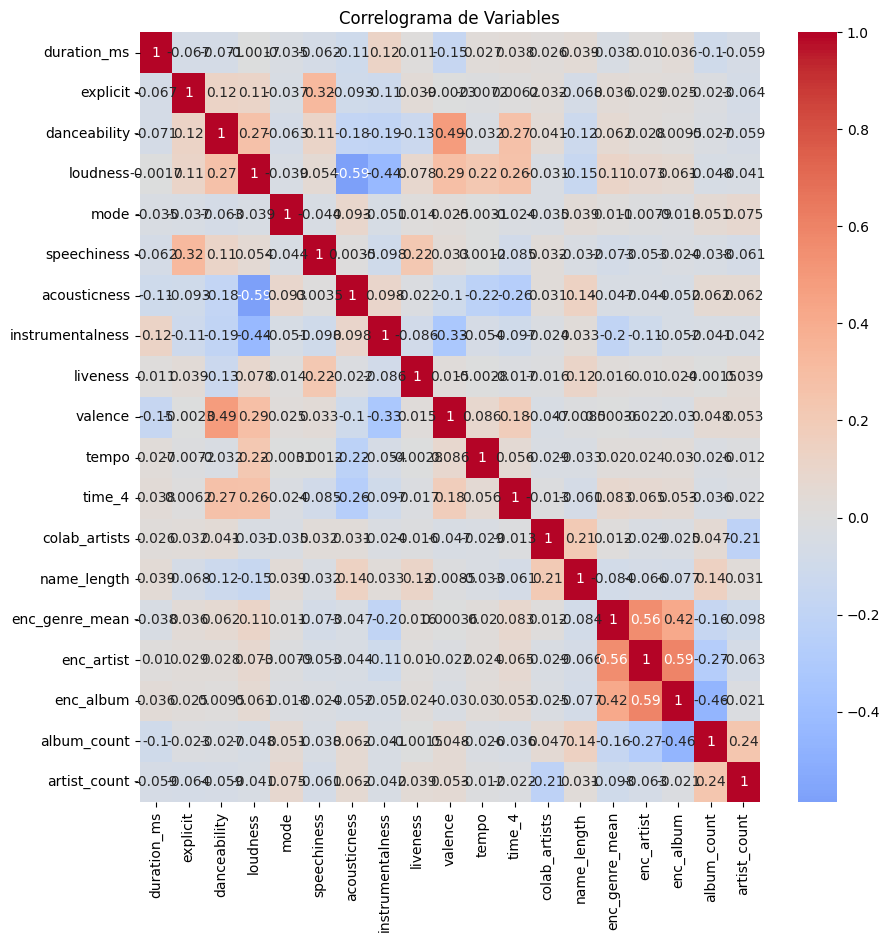

In [23]:
correlation_matrix = x.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlograma de Variables")
plt.show()

Para los modelos se considerarán las variables que tengan un puntaje de información mutua mayor a 0.01

In [24]:
mu_inf=mutual_info_regression(x,y)

dict(zip(mu_inf,x.columns))

{np.float64(0.08920663684966623): 'duration_ms',
 np.float64(0.0004817696872976285): 'explicit',
 np.float64(0.0431503646985929): 'danceability',
 np.float64(0.08012121499292757): 'loudness',
 np.float64(0.0044338937069206): 'mode',
 np.float64(0.0339664765107095): 'speechiness',
 np.float64(0.06970085528553671): 'acousticness',
 np.float64(0.06948099570226152): 'instrumentalness',
 np.float64(0.030536136537402392): 'liveness',
 np.float64(0.03357226842283545): 'valence',
 np.float64(0.08968250300793912): 'tempo',
 np.float64(5.8348359695870045e-05): 'time_4',
 np.float64(0.010818061276851587): 'colab_artists',
 np.float64(0.012123540983724368): 'name_length',
 np.float64(0.8691551070315437): 'enc_genre_mean',
 np.float64(0.6486536708887556): 'enc_artist',
 np.float64(0.7639349616884017): 'enc_album',
 np.float64(0.22745610169072084): 'album_count',
 np.float64(0.11903897420846121): 'artist_count'}

In [25]:
x.iloc[:,mu_inf>0.01].columns

Index(['duration_ms', 'danceability', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'colab_artists', 'name_length', 'enc_genre_mean', 'enc_artist',
       'enc_album', 'album_count', 'artist_count'],
      dtype='object')

In [26]:
x=x.iloc[:,mu_inf>0.01]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### Modelos

In [28]:
stacking=pd.DataFrame()

#### Bagging

In [29]:
bag=BaggingRegressor(random_state=1,n_estimators=200)

bag_grid={
    'max_features':[0.5,0.75,1.0]
}

bag_cv=GridSearchCV(bag,bag_grid,cv=3,n_jobs=-1,scoring='neg_root_mean_squared_error')
bag_cv.fit(X_train,y_train)
bag_cv.best_score_,bag_cv.best_params_

(np.float64(-9.583889140460192), {'max_features': 1.0})

In [30]:
bag_cv.best_params_

{'max_features': 1.0}

In [31]:
bag_model=bag_cv.best_estimator_
bag_model.fit(X_train,y_train)
y_pred=bag_model.predict(X_test)
stacking['bagging']=bag_model.predict(X_train)
root_mean_squared_error(y_test,y_pred)


9.219520571506905

#### Random Forest

In [32]:
rf=RandomForestRegressor(random_state=1)

rf_grid={
    #'n_estimators':[200,300],
    'n_estimators':[200],
    'max_features':[0.33,0.5,0.66],
    #'max_features':[0.33],
    'max_depth':[40,80,120]
}

rf_cv=GridSearchCV(rf,rf_grid,cv=3,n_jobs=-1,scoring='neg_root_mean_squared_error')
rf_cv.fit(X_train,y_train)
rf_cv.best_score_,rf_cv.best_params_

(np.float64(-9.551962198847157),
 {'max_depth': 80, 'max_features': 0.5, 'n_estimators': 200})

In [33]:
rf_model=rf_cv.best_estimator_
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
stacking['forest']=rf_model.predict(X_train)
root_mean_squared_error(y_test,y_pred)


9.180521550899858

In [34]:
dict(zip(x.columns,rf_model.feature_importances_))

{'duration_ms': np.float64(0.019876623976814226),
 'danceability': np.float64(0.018302772046792138),
 'loudness': np.float64(0.018951877783190487),
 'speechiness': np.float64(0.01658591076830285),
 'acousticness': np.float64(0.020092488834152912),
 'instrumentalness': np.float64(0.018610022449105337),
 'liveness': np.float64(0.015904576317004555),
 'valence': np.float64(0.01687114552694085),
 'tempo': np.float64(0.015957842730942574),
 'colab_artists': np.float64(0.005952663237303258),
 'name_length': np.float64(0.013959201691642302),
 'enc_genre_mean': np.float64(0.14558451891186908),
 'enc_artist': np.float64(0.1724890054865215),
 'enc_album': np.float64(0.45015193977607615),
 'album_count': np.float64(0.03787483864086148),
 'artist_count': np.float64(0.012834571822480347)}

#### AdaBoost

In [35]:
ada=AdaBoostRegressor(random_state=0,n_estimators=200)

ada_grid={
    'learning_rate':[0.001,0.01,0.1]
}

ada_cv=GridSearchCV(ada,ada_grid,cv=3,n_jobs=-1,scoring='neg_root_mean_squared_error')
ada_cv.fit(X_train,y_train)
ada_cv.best_score_,ada_cv.best_params_

(np.float64(-12.02575389027983), {'learning_rate': 0.01})

In [36]:
ada_model=ada_cv.best_estimator_
ada_model.fit(X_train,y_train)
#stacking['adaboost']=ada_model.predict(X_train)
y_pred=ada_model.predict(X_test)
root_mean_squared_error(y_test,y_pred)

11.877064876056297

#### Gradient Boost

In [37]:
grad=GradientBoostingRegressor(random_state=0,n_estimators=200)

grad_grid={
    'learning_rate': [ 0.05, 0.1,0.25],            
    'subsample': [0.6, 0.8, 1.0],               
    'max_features': [0.33,0.5,1.0]
}

grad_cv=GridSearchCV(grad,grad_grid,n_jobs=-1,cv=3,scoring='neg_root_mean_squared_error')
grad_cv.fit(X_train,y_train)
grad_cv.best_score_,grad_cv.best_params_


(np.float64(-10.013916644570044),
 {'learning_rate': 0.25, 'max_features': 1.0, 'subsample': 1.0})

In [38]:
grad_model=grad_cv.best_estimator_
grad_model.fit(X_train,y_train)
y_pred=grad_model.predict(X_test)
#stacking['gradboost']=grad_model.predict(X_train)
root_mean_squared_error(y_test,y_pred)

9.748284818324814

#### XGBoost

In [39]:
xgb=XGBRegressor()

xgb_grid={
    'learning_rate': [ 0.01,0.05,0.1],
    'max_depth': [3,5,10],
    'subsample': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 3], 
    'reg_alpha': [0],
    'reg_lambda': [1],  
}
xgb_cv=GridSearchCV(xgb,xgb_grid,cv=3,scoring='neg_root_mean_squared_error',n_jobs=5)
xgb_cv.fit(X_train,y_train)
xgb_cv.best_score_,xgb_cv.best_params_

(np.float64(-9.63476816813151),
 {'gamma': 0,
  'learning_rate': 0.05,
  'max_depth': 10,
  'reg_alpha': 0,
  'reg_lambda': 1,
  'subsample': 0.8})

In [40]:
xgb_model=xgb_cv.best_estimator_
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
stacking['xgb']=xgb_model.predict(X_train)
root_mean_squared_error(y_test,y_pred)


9.344587326049805

#### Stacking

In [41]:
stack_test=pd.DataFrame()
stack_test['bagging']=bag_model.predict(X_test)
stack_test['forest']=rf_model.predict(X_test)
stack_test['xgb']=xgb_model.predict(X_test)


In [42]:
stack=LinearRegression()
stack.fit(stacking ,y_train)
y_pred=stack.predict(stack_test)
root_mean_squared_error(y_test,y_pred)


9.286332633259462

### Kaggle envío

In [43]:
x_sub=dataTesting[x.columns]

In [44]:
y_sub=rf_model.predict(x_sub)
y_sub=pd.DataFrame(y_sub,columns=['Popularity'])
y_sub.head()

,Popularity
0,48.240
1,14.705
2,0.130
3,0.055
4,35.835


In [45]:
stack_sub=pd.DataFrame()
stack_sub['bagging']=bag_model.predict(x_sub)
stack_sub['forest']=rf_model.predict(x_sub)
stack_sub['xgb']=xgb_model.predict(x_sub)
#y_sub=stack.predict(stack_sub)
#y_sub=pd.DataFrame(y_sub,columns=['Popularity'])
#y_sub.loc[y_sub['Popularity']<0,'Popularity']=0
#y_sub.loc[y_sub['Popularity']>1000,'Popularity']=100
#y_sub.head()


In [46]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_sub.to_csv('test_submission_file.csv', index_label='ID')